In [ ]:
import numpy as np
import pandas as pd
import sklearn

# Loading the Dataset

In [105]:
df=pd.read_csv('car.data')
copy=df
df.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [106]:
col_names = ['sale','maintainance','doors','seats','boot_space','safety','quality']
df = pd.read_csv('car.data',names=col_names)

In [107]:
df.head()

,sale,maintainance,doors,seats,boot_space,safety,quality
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


# Data Cleaning

In [108]:
df['sale'].unique()

array(['vhigh', 'high', 'med', 'low'], dtype=object)

In [109]:
def high(x):
    if x=='vhigh':
        return 0
    elif x=='high':
        return 1
    elif x=='med':
        return 2
    else:
        return 3

In [110]:
df['sale']=df['sale'].apply(high)

In [111]:
df['sale'].unique()

array([0, 1, 2, 3], dtype=int64)

In [112]:
df['maintainance'].unique()

array(['vhigh', 'high', 'med', 'low'], dtype=object)

In [113]:
df['maintainance']=df['maintainance'].apply(high)

In [114]:
df.head()

,sale,maintainance,doors,seats,boot_space,safety,quality
0,0,0,2,2,small,low,unacc
1,0,0,2,2,small,med,unacc
2,0,0,2,2,small,high,unacc
3,0,0,2,2,med,low,unacc
4,0,0,2,2,med,med,unacc


In [115]:
df['boot_space'].unique()

array(['small', 'med', 'big'], dtype=object)

In [116]:
df['safety'].unique()

array(['low', 'med', 'high'], dtype=object)

In [117]:
df['quality'].unique()

array(['unacc', 'acc', 'vgood', 'good'], dtype=object)

In [118]:
def small(x):
    if x== 'small':
        return 0
    elif x=='med':
        return 1
    else:
        return 2
def low(x):
    if x== 'med':
        return 0
    elif x == 'high':
        return 1
    else:
        return 2
def unaccn(x):
    if x == 'unacc':
        return 0
    elif x=='acc':
        return 1
    elif x=='vgood':
        return 2
    else:
        return 3
def two(x):
    if x=='5more':
        return 0


In [119]:
df['boot_space']=df['boot_space'].apply(small)
df['safety']=df['safety'].apply(low)
#df['2']=df['2'].apply(two)

In [120]:
df.head()

,sale,maintainance,doors,seats,boot_space,safety,quality
0,0,0,2,2,0,2,unacc
1,0,0,2,2,0,0,unacc
2,0,0,2,2,0,1,unacc
3,0,0,2,2,1,2,unacc
4,0,0,2,2,1,0,unacc


# Data Processing And EDA

In [121]:
df.isnull().sum()

sale            0
maintainance    0
doors           0
seats           0
boot_space      0
safety          0
quality         0
dtype: int64

<AxesSubplot:>

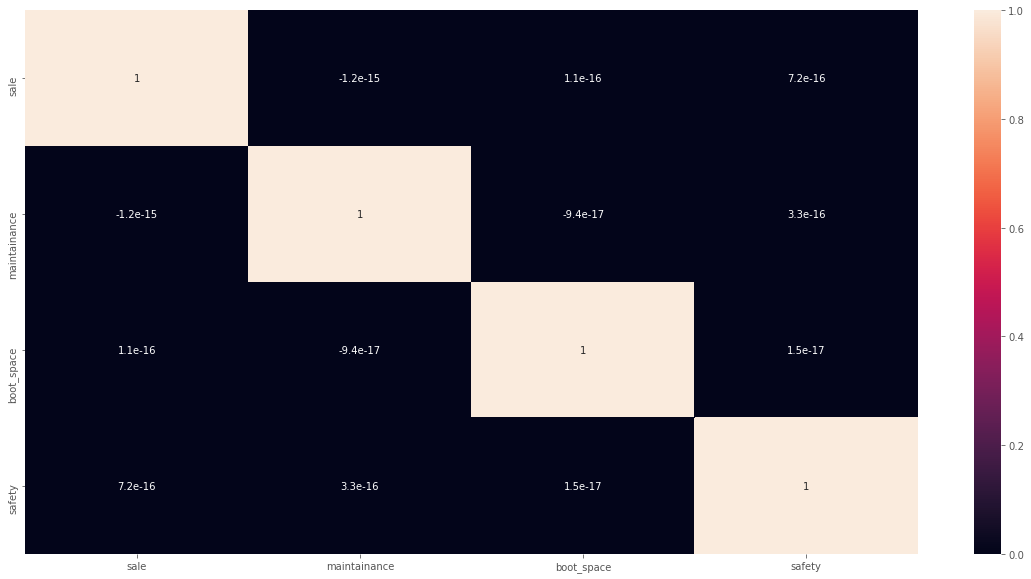

In [122]:
import seaborn as sns
import matplotlib.pyplot as plt #for plotting maps and graphs
plt.style.use('ggplot')
corr = df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True)

In [123]:
df['boot_space'].unique()

array([0, 1, 2], dtype=int64)

In [124]:
df['safety'].unique()

array([2, 0, 1], dtype=int64)

In [125]:
df['quality'].unique()

array(['unacc', 'acc', 'vgood', 'good'], dtype=object)

In [126]:
df['doors'].unique()

array(['2', '3', '4', '5more'], dtype=object)

In [127]:
def two(x):
    if x == '2':
        return 2
    elif x == '3':
        return 3
    elif x == '4':
        return 4
    else:
        return 5

In [128]:
df['doors']=df['doors'].apply(two)

In [129]:
df['doors'].unique()

array([2, 3, 4, 5], dtype=int64)

In [130]:
df['seats'].unique()

array(['2', '4', 'more'], dtype=object)

In [131]:
def two1(x):
    if x == '2':
        return 2
    elif x == '4':
        return 4
    else:
        return 5

In [132]:
df['seats'] = df['seats'].apply(two1)

In [162]:
df.head()

,sale,maintainance,doors,seats,boot_space,safety,quality
0,0,0,2,2,0,2,unacc
1,0,0,2,2,0,0,unacc
2,0,0,2,2,0,1,unacc
3,0,0,2,2,1,2,unacc
4,0,0,2,2,1,0,unacc


# Model Training

In [154]:
x=df.drop('quality',axis=1)
y=df['quality']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.3, random_state=42)

In [168]:
from sklearn.svm import SVC
clf = SVC()
clf.fit(x_train, y_train)

SVC()

In [169]:
clf.score(x_test,y_test)

0.9229287090558767

In [170]:
clf.predict(x_test)[:10]

array(['unacc', 'acc', 'unacc', 'acc', 'unacc', 'acc', 'unacc', 'unacc',
       'unacc', 'unacc'], dtype=object)

In [171]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
nb = gnb.fit(x_train,y_train)

In [172]:
nb.score(x_test,y_test)

0.7822736030828517